In [ ]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

!unzip -qq "/content/gdrive/MyDrive/open (5).zip"

Mounted at /content/gdrive/


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train_columns = pd.DataFrame({'columns':train.columns,
                             'info':['아이디','(음악 등이) 댄스에 적합함.','에너지','키(음높이?)','소리의 세기','언어능력','반주구간','기약성','활기참','발렌스','템포','재생길이','장르']})

In [ ]:
train_columns

,columns,info
0,ID,아이디
1,danceability,(음악 등이) 댄스에 적합함.
2,energy,에너지
3,key,키(음높이?)
4,loudness,소리의 세기
5,speechiness,언어능력
6,acousticness,반주구간
7,instrumentalness,기약성
8,liveness,활기참
9,valence,발렌스


In [ ]:
# 데이터 모양을 보여주는 함수
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary
  
resumetable(train)

데이터셋 형상: (25383, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,ID,object,0,25383,TRAIN_00000,TRAIN_00001,TRAIN_00002
1,danceability,float64,0,824,0.3341,0.6344,0.3983
2,energy,float64,0,852,0.9231,0.5955,0.1107
3,key,int64,0,12,10,10,8
4,loudness,float64,0,7687,0.854,0.2826,0.2459
5,speechiness,float64,0,1344,0.3797,0.1378,0.0247
6,acousticness,float64,0,1912,0.008,0.0,0.774
7,instrumentalness,float64,0,1685,0.0002,0.7137,0.0
8,liveness,float64,0,1581,0.7697,0.1597,0.5105
9,valence,float64,0,1571,0.7902,0.4162,0.4291


In [ ]:
le = LabelEncoder()

In [ ]:
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [ ]:
train['genre'] = le.fit_transform(train['genre'])

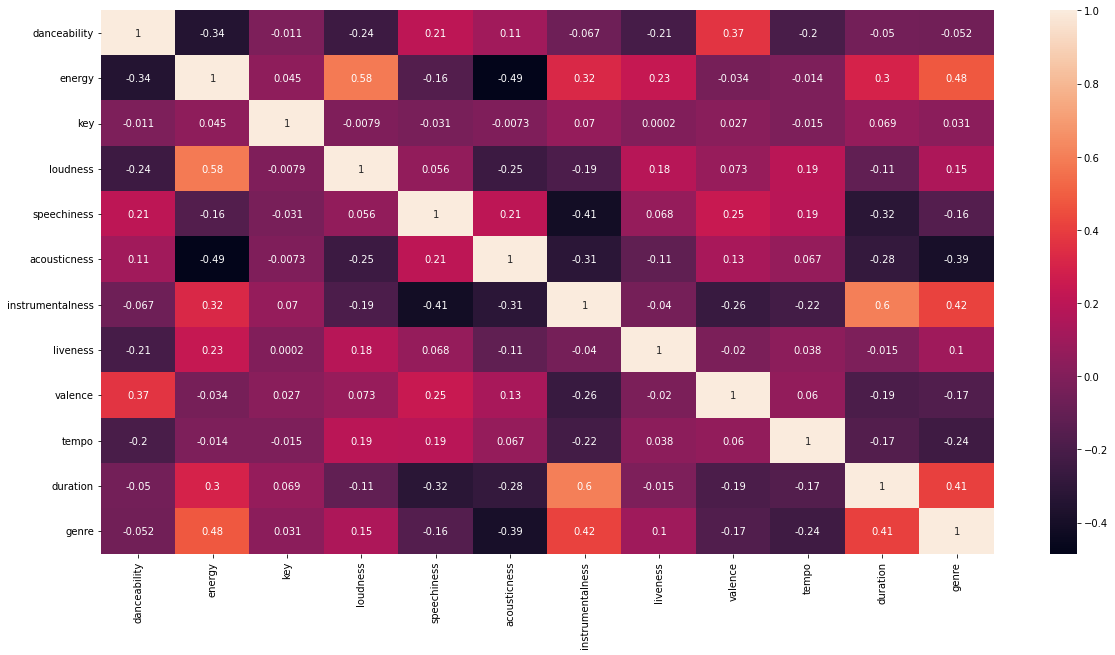

In [ ]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
fig = plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

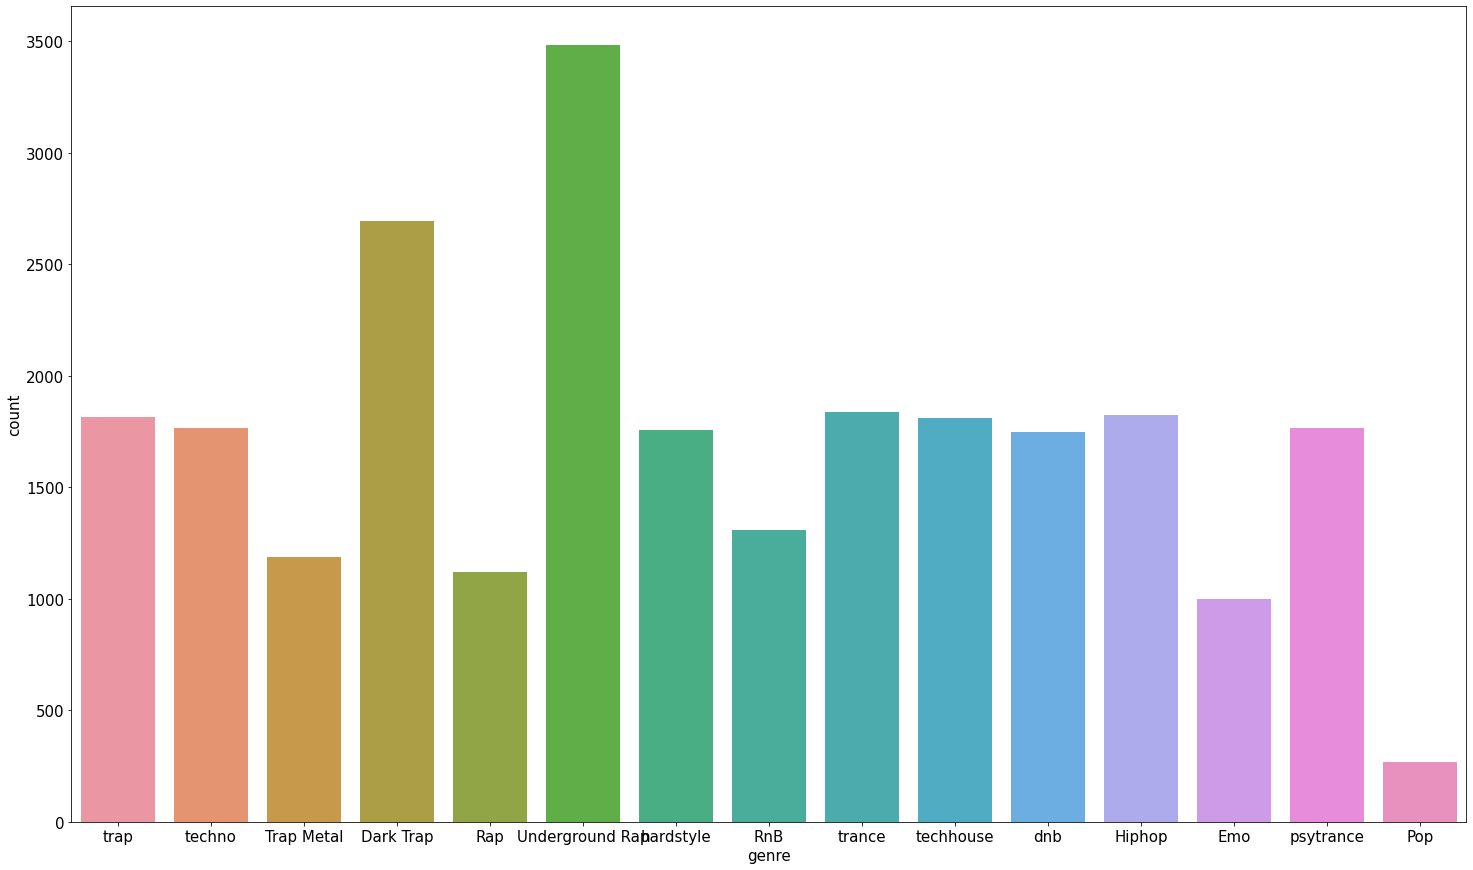

In [ ]:
mpl.rc('font',size=15)
plt.figure(figsize=(25,15))

ax = sns.countplot(x='genre',data=train)


지금까지 본 것.